<a href="https://colab.research.google.com/github/ferozferoz/DeepLearn/blob/master/keras_cat_dog_classify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
"""1 . This example demonstrates Convolutional neural network to classify cat and dog pictures.
   2.  Performance imprpvements using image augmentation,  using convnets like VGG"""
import numpy as np
from zipfile import ZipFile 
from keras.preprocessing.image import image

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

In [0]:
import os
base_dir = '/content/gdrive/My Drive/ColabNotebooks/CatDog'
train_dir = os.path.join(base_dir,'train')
#os.mkdir(train_dir)
train_cat_dir = os.path.join(train_dir,'cat')
#os.mkdir(train_cat_dir)
train_dog_dir = os.path.join(train_dir,'dog')
#os.mkdir(train_dog_dir)

validation_dir = os.path.join(base_dir,'validation')
#os.mkdir(validation_dir)
validation_cat_dir = os.path.join(validation_dir,'cat')
#os.mkdir(validation_cat_dir)
validation_dog_dir = os.path.join(validation_dir,'dog')
#os.mkdir(validation_dog_dir)

test_dir = os.path.join(base_dir,'test')
#os.mkdir(test_dir)
test_cat_dir = os.path.join(test_dir,'cat')
#os.mkdir(test_cat_dir)
test_dog_dir = os.path.join(test_dir,'dog')
#os.mkdir(test_dog_dir)


In [5]:
print("total training cat images",len(os.listdir(train_cat_dir)))
print("total training dog images",len(os.listdir(train_dog_dir)))
print("total validation cat images",len(os.listdir(validation_cat_dir)))
print("total validation dog images",len(os.listdir(validation_dog_dir)))
print("total test cat images",len(os.listdir(test_cat_dir)))
print("total test dog images",len(os.listdir(test_cat_dir)))

total training cat images 500
total training dog images 500
total validation cat images 250
total validation dog images 250
total test cat images 250
total test dog images 250


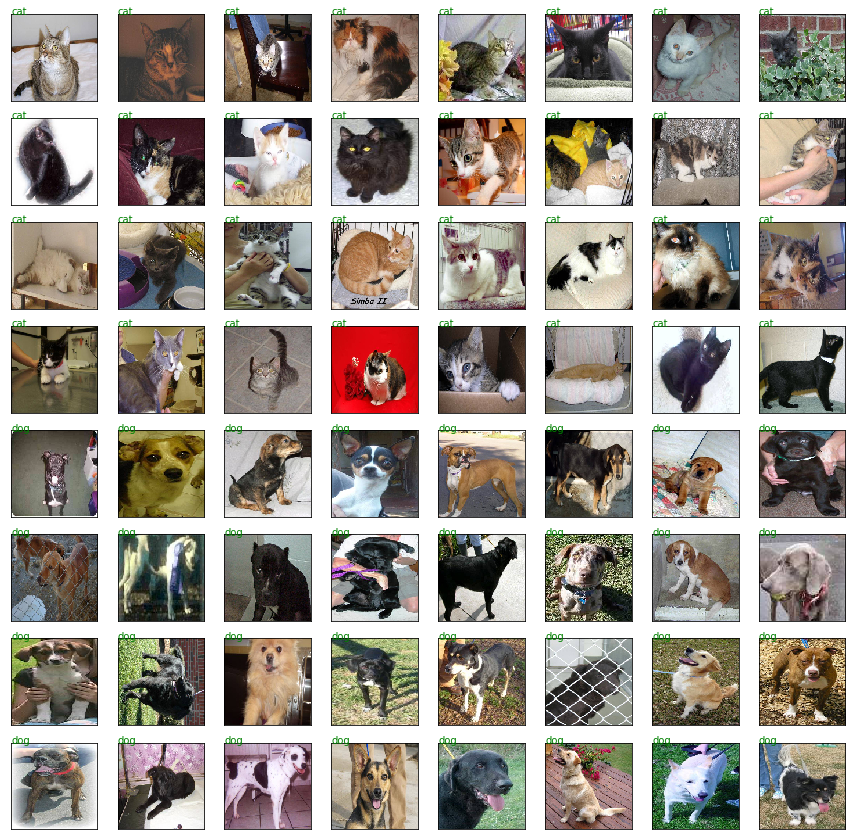

In [8]:
"""Plotting 64 dogs and cats pics in a test folder"""
import matplotlib.pyplot as plt
test_cat= ['cat.{}.jpg'.format(i) for i in range(750,782)]
test_dog= ['dog.{}.jpg'.format(i) for i in range(12250,12282)]
fig, ax = plt.subplots(8, 8, figsize=(15,15),subplot_kw={'xticks':[], 'yticks':[]},gridspec_kw=dict(hspace=0.2, wspace=0.2))
k=0
l=0

for i in range(8):
    if (i < 4):
      for j in range(8):
        img_path = '/content/gdrive/My Drive/ColabNotebooks/CatDog/test/cat/'+test_cat[k]
        img = image.load_img(img_path,target_size=(150,150))
        ax[i,j].imshow(img, cmap='binary', interpolation='nearest')
        ax[i,j].text(.05,.05,str(test_cat[k]).split('.')[0],color='green')
        k+=1
    else:
      for j in range(8):
        img_path = '/content/gdrive/My Drive/ColabNotebooks/CatDog/test/dog/'+test_dog[l]
        img = image.load_img(img_path,target_size=(150,150))
        ax[i,j].imshow(img, cmap='binary', interpolation='nearest')
        ax[i,j].text(.05,.05,str(test_dog[l]).split('.')[0],color='green')
        l+=1



In [0]:
test_cat_array = map(lambda x: image.load_img('/content/gdrive/My Drive/ColabNotebooks/CatDog/test/cat/'+x,target_size=(150,150)), test_cat)
test_cat_array = map(lambda x: image.img_to_array(x), test_cat_array)
test_cat_array = np.asarray(list(test_cat_array))

test_dog_array = map(lambda x: image.load_img('/content/gdrive/My Drive/ColabNotebooks/CatDog/test/dog/'+x,target_size=(150,150)), test_dog)
test_dog_array = map(lambda x: image.img_to_array(x), test_dog_array)
test_dog_array = np.asarray(list(test_dog_array))

test_array_input = np.concatenate((test_cat_array,test_dog_array),axis=0)
test_array_label = np.concatenate((np.ones(32),np.zeros(32)))

In [10]:
""" Because the image data is quite large in size we do not process all data in memory rather we do it in batches. 
Here we create a pipeline where  a batch of 20 images to the training algorithm"""

from keras.preprocessing.image import ImageDataGenerator

""" Normalising image data """

train_datagen = ImageDataGenerator(rescale = 1./255)
validation_datagen = ImageDataGenerator(rescale = 1./255)
""" creating generator object """
train_data_generator = train_datagen.flow_from_directory(train_dir,target_size = (150,150), batch_size = 20 , class_mode = 'binary')
validation_data_generator = validation_datagen.flow_from_directory(validation_dir,target_size = (150,150), batch_size = 20 , class_mode = 'binary')

Found 1000 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [11]:
for data_batch, label_batch in train_data_generator:
  print('data batch shape',data_batch.shape)
  print('data batch shape',label_batch.shape)
  break

data batch shape (20, 150, 150, 3)
data batch shape (20,)


In [12]:
from keras import layers,models
model = models.Sequential()
# 3 by 3 convolution with 32 filters having relu activation
model.add(layers.Conv2D(32,(3,3), activation = 'relu',input_shape = (150,150,3)))
# 2 by 2 maxpooling 
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
# we convert 3 dim vector to one dim array to be fed to fully connected layer
model.add(layers.Flatten())
model.add(layers.Dense(512,activation = 'relu'))
# we are returning two clases hence using sigmoid activation and returning single length value
model.add(layers.Dense(1,activation = 'sigmoid'))
model.summary()





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)  

In [0]:
from keras import optimizers
model.compile(loss = 'binary_crossentropy', optimizer=optimizers.RMSprop(lr=.001),metrics=['acc'])

In [0]:
history = model.fit_generator(train_data_generator,steps_per_epoch=50,epochs=40,validation_data=validation_data_generator,validation_steps=25)

In [0]:
model.save('/content/gdrive/My Drive/ColabNotebooks/CatDog/cats_and_dogs_small_1.h5')

validation accuracy 0.5000000035762787


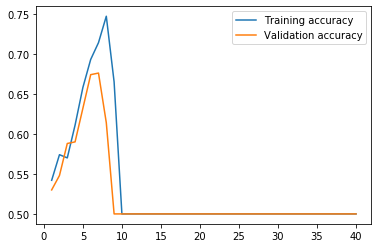

In [0]:
import matplotlib.pyplot as plt
acc = history.history['acc']
validation_acc = history.history['val_acc']
print("validation accuracy" , validation_acc[-1])
epoch = range(1,len(acc)+1)
plt.plot(epoch,acc,label = 'Training accuracy')
plt.plot(epoch,validation_acc,label = 'Validation accuracy')
plt.legend()

validation loss 8.059047889709472


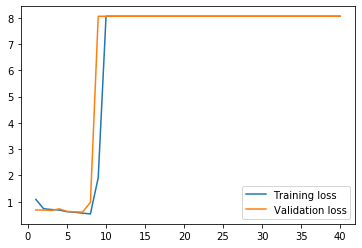

In [0]:
loss = history.history['loss']
validation_loss = history.history['val_loss']
print("validation loss",validation_loss[-1])
epoch = range(1,len(loss)+1)
plt.plot(epoch,loss,label = 'Training loss')
plt.plot(epoch,validation_loss,label = 'Validation loss')
plt.legend()


In [0]:
from keras.models import load_model
model = load_model('/content/gdrive/My Drive/ColabNotebooks/CatDog/cats_and_dogs_small_1.h5')
test_data_actual_label = model.predict(test_array_input)

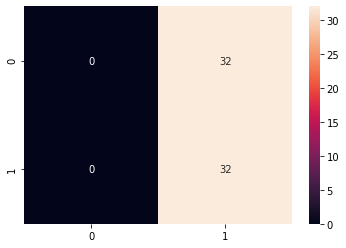

In [16]:
# plotting a confusion matrix. confusion matrix can help to qualitatively asses classification accuracy
from sklearn.metrics import confusion_matrix
import seaborn as sns
test_data_actual_label = test_data_actual_label.reshape(-1)
cmatrix  = confusion_matrix(test_array_label,test_data_actual_label)
sns.heatmap(cmatrix,annot=True)

In [17]:
"""Using existing network to extract features, VGG has been trained on million on images data including cat and dog hence we believe that 
it will help to extract features relevant features in cat and dog images. we can store that transformed data and use it to run on a dense layer. 
this is a fast method to extract features from data as it does not involve running complex convolutional model but only densely connected layer model. Disadvantage is that you cannot do data augmentation in this approach"""

from keras.applications import VGG16
conv_base = VGG16(weights = 'imagenet', include_top =   False , input_shape = (150,150,3))
conv_base.summary()

58892288/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
______________________________________________________________

In [0]:
""" generating data from pre trained  VGG model. Using exsiting model can be used to learn features and fed to fully connected layer"""
datagen = ImageDataGenerator(rescale = 1./255)
batch_size = 20 
def extract_features(directory,sample_count):
  features = np.zeros((sample_count,4,4,512))
  label = np.zeros(shape = (sample_count))
  generator = datagen.flow_from_directory(directory,target_size = (150,150),batch_size = batch_size, class_mode = 'binary')
  i=0
  for input_batch, label_batch in generator:
    feature_batch = conv_base.predict(input_batch)
    features[i*batch_size:(i+1)*batch_size] = feature_batch
    label[i*batch_size:(i+1)*batch_size] = label_batch
    i+=1
    if i*batch_size >= sample_count:
      break
  return features,label

train_feature,train_label = extract_features(train_dir,1000)
validation_feature,validation_label = extract_features(validation_dir,500)
test_feature,test_label = extract_features(test_dir,500)


In [0]:
""" reshaping the data for fully connected layer"""
train_feature = np.reshape(train_feature, (1000, 4 * 4 * 512))
validation_feature = np.reshape(validation_feature, (500, 4 * 4 * 512))
test_feature = np.reshape(test_feature, (500, 4 * 4 * 512))

In [0]:
""" defining fully connected layer for VGG input"""

from keras import layers,models
from keras import optimizers
model_convnet = models.Sequential()
model_convnet.add(layers.Dense(256, activation='relu', input_dim =8192 ))
model_convnet.add(layers.Dropout(0.5))
model_convnet.add(layers.Dense(1, activation='sigmoid'))
model_convnet.compile(optimizer=optimizers.RMSprop(lr=2e-5),loss='binary_crossentropy',metrics=['acc'])
history_convnet = model_convnet.fit(train_feature, train_label,epochs=30,batch_size=20,validation_data=(validation_feature, validation_label))

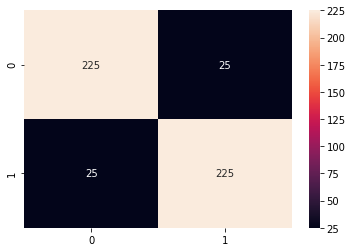

In [30]:
# Confusion matrix provide good accuracy of VGG model
model_convnet.save('/content/gdrive/My Drive/ColabNotebooks/CatDog/cat_dog_vgg.h5')
test_label_predicted = model_convnet.predict(test_feature)
test_label_predicted = map(lambda x : 1. if x > 0.5 else 0. , test_label_predicted)
cmatrix_1  = confusion_matrix(test_label,np.asarray(list(test_label_predicted)))
sns.heatmap(cmatrix_1,annot=True,fmt='g')



validation accuracy 0.8960000014305115


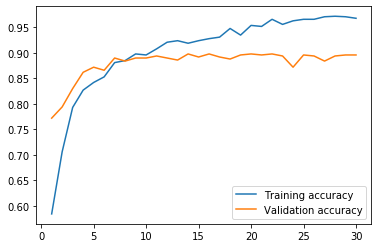

In [23]:
acc_convnet = history_convnet.history['acc']
validation_acc_convnet = history_convnet.history['val_acc']
print("validation accuracy" , validation_acc_convnet[-1])
epoch = range(1,len(acc_convnet)+1)
plt.plot(epoch,acc_convnet,label = 'Training accuracy')
plt.plot(epoch,validation_acc_convnet,label = 'Validation accuracy')
plt.legend()

In [0]:
"""visualizing individual convnet filters - How each connvnet layer learn various features of image, the early layer learning sharp features while the 
deeper layer learning more abstract features"""
from keras.models import load_model
model = load_model('/content/gdrive/My Drive/ColabNotebooks/CatDog/cats_and_dogs_small_1.h5')
model.summary()



Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)    

(1, 150, 150, 3)
(?, 150, 150, 3)


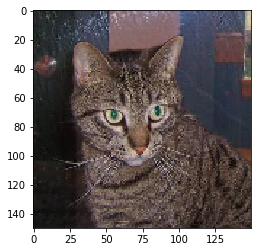

In [0]:
# Sample image to analyse layer outputs 
path = '/content/gdrive/My Drive/ColabNotebooks/CatDog/train/cat/cat.1.jpg'
import matplotlib.pyplot as plt
from keras.preprocessing import image 
import numpy as np
img = image.load_img(path, target_size = (150,150))
image_tensor = image.img_to_array(img)
image_tensor = np.expand_dims(image_tensor,axis=0) # 1,150,150,3 input for CNN model
print(image_tensor.shape)
print(model.input.shape)
plt.imshow(img)



(1, 148, 148, 32)
(1, 74, 74, 32)
(1, 72, 72, 64)
(1, 36, 36, 64)
(1, 34, 34, 128)
(1, 17, 17, 128)
(1, 15, 15, 128)
(1, 7, 7, 128)


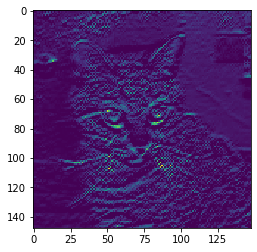

In [0]:

from keras import models
layer_output = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_output)
# the activation model defined has one input layer and many output layers. one output per layer of activation
activations = activation_model.predict(image_tensor)

for i in range(8):
  print(activations[i].shape)

plt.imshow(activations[0][0,:,:,0])


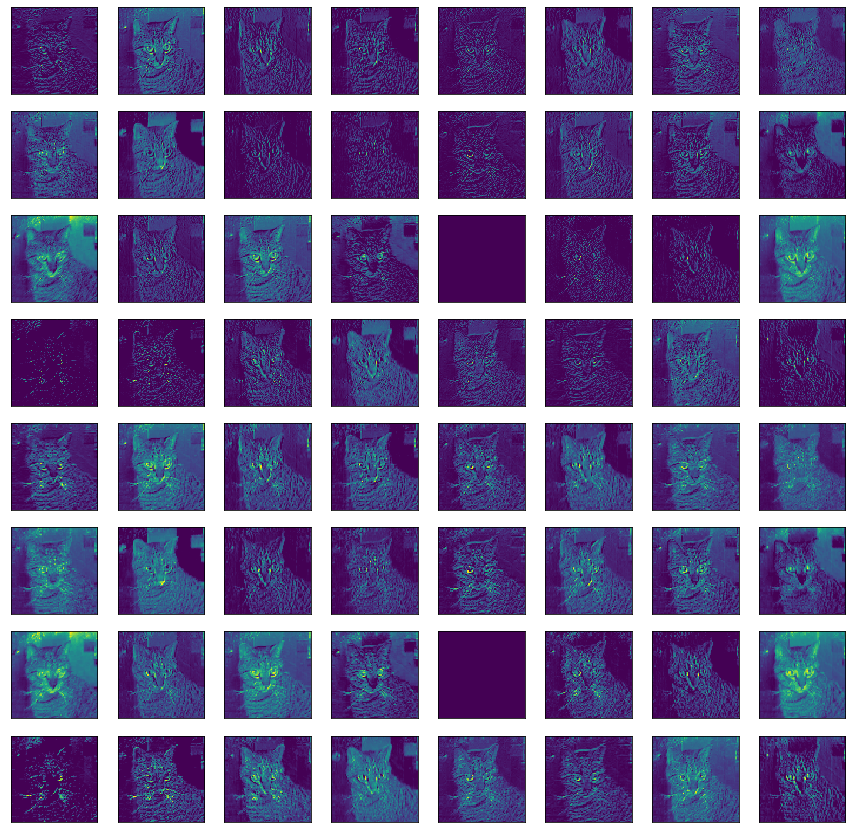

In [0]:

fig, ax = plt.subplots(8, 8, figsize=(15,15),subplot_kw={'xticks':[], 'yticks':[]},gridspec_kw=dict(hspace=0.2, wspace=0.2))
k=0
for i in range(4):
    for j in range(8):
        ax[i,j].imshow(activations[0][0,:,:,k],cmap='viridis')
        k=k+1
l=0
for i in range(4,8):
    for j in range(8):
        ax[i,j].imshow(activations[1][0,:,:,l],cmap='viridis')
        l=l+1



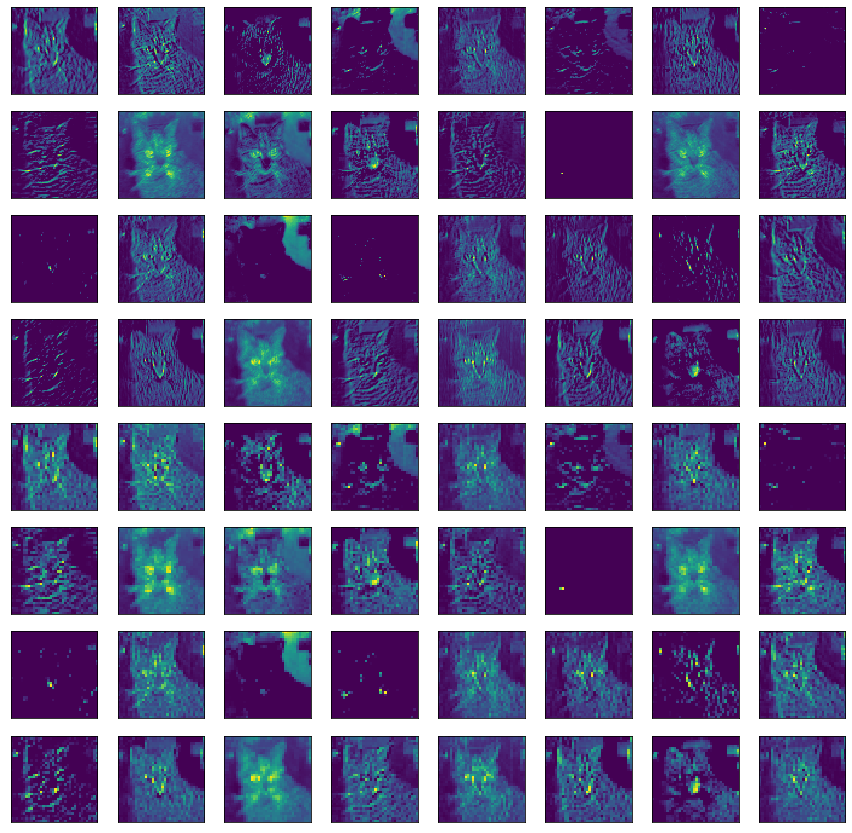

In [0]:
fig, ax = plt.subplots(8, 8, figsize=(15,15),subplot_kw={'xticks':[], 'yticks':[]},gridspec_kw=dict(hspace=0.2, wspace=0.2))
k=0
for i in range(4):
    for j in range(8):
        ax[i,j].imshow(activations[2][0,:,:,k],cmap='viridis')
        k=k+1
l=0
for i in range(4,8):
    for j in range(8):
        ax[i,j].imshow(activations[3][0,:,:,l],cmap='viridis')
        l=l+1



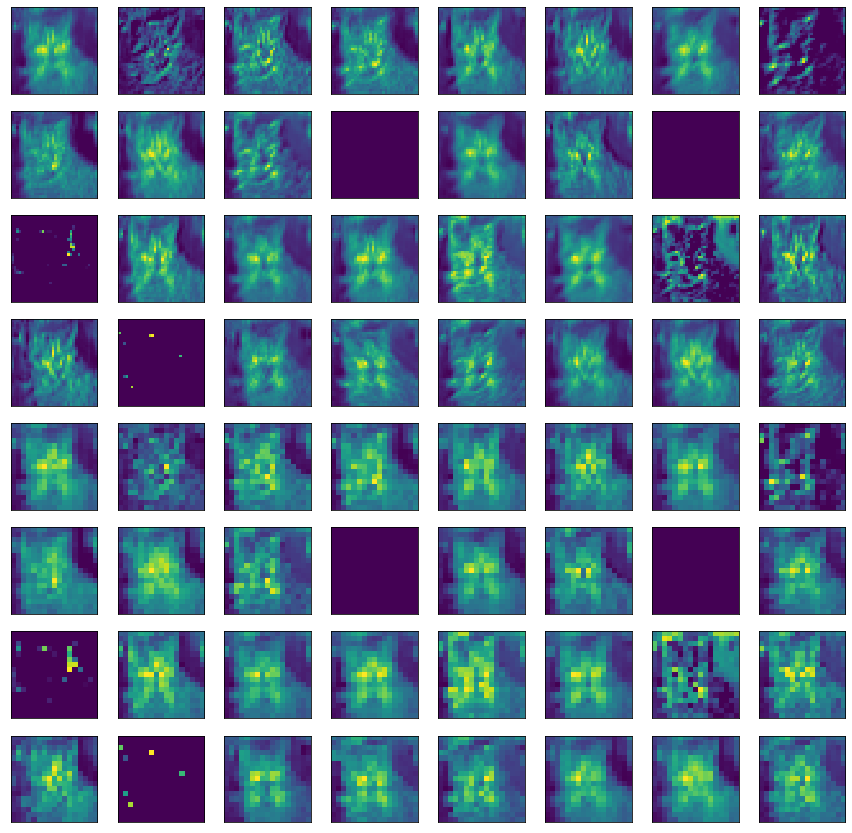

In [0]:
fig, ax = plt.subplots(8, 8, figsize=(15,15),subplot_kw={'xticks':[], 'yticks':[]},gridspec_kw=dict(hspace=0.2, wspace=0.2))
k=0
for i in range(4):
    for j in range(8):
        ax[i,j].imshow(activations[4][0,:,:,k],cmap='viridis')
        k=k+1
l=0
for i in range(4,8):
    for j in range(8):
        ax[i,j].imshow(activations[5][0,:,:,l],cmap='viridis')
        l=l+1



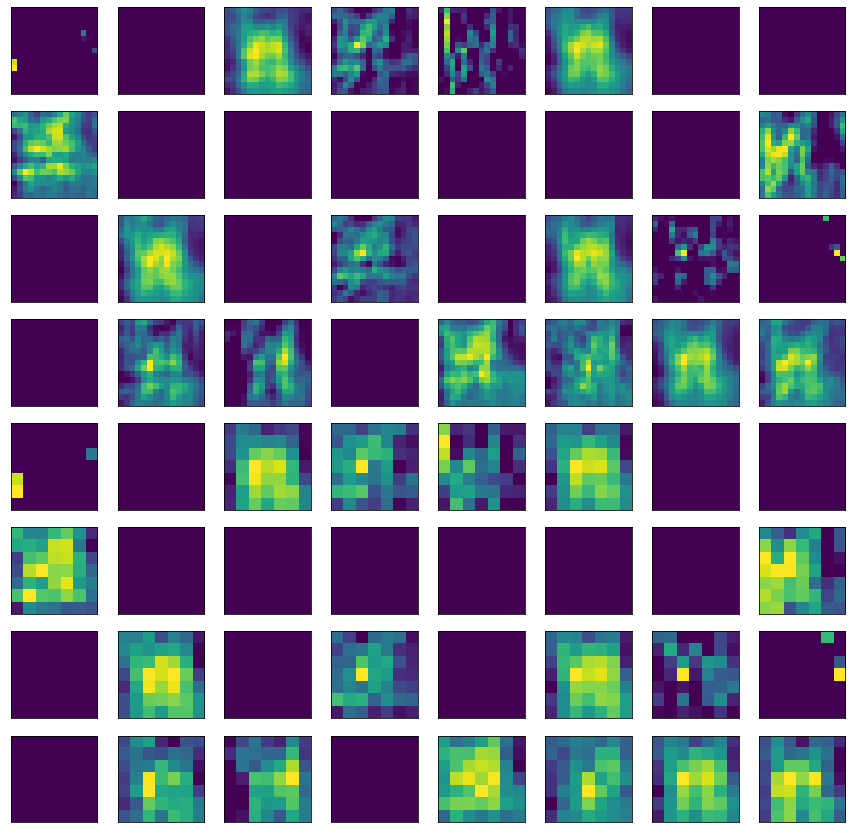

In [0]:
fig, ax = plt.subplots(8, 8, figsize=(15,15),subplot_kw={'xticks':[], 'yticks':[]},gridspec_kw=dict(hspace=0.2, wspace=0.2))
k=0
for i in range(4):
    for j in range(8):
        ax[i,j].imshow(activations[6][0,:,:,k],cmap='viridis')
        k=k+1
l=0
for i in range(4,8):
    for j in range(8):
        ax[i,j].imshow(activations[7][0,:,:,l],cmap='viridis')
        l=l+1



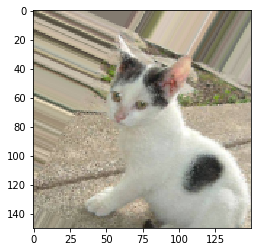

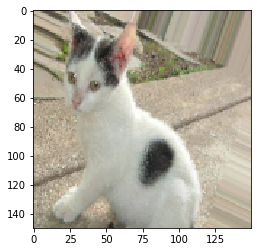

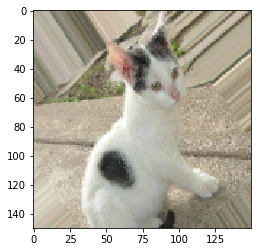

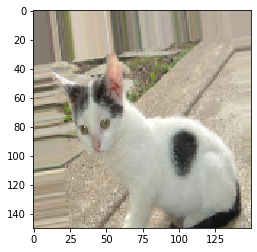

In [0]:
# demonstration of image augmentation by generating image of various sizes
import matplotlib.pyplot as plt
datagen = ImageDataGenerator(rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')
from keras.preprocessing.image import image
fnames = [os.path.join(train_cat_dir,fname) for fname in os.listdir(train_cat_dir)]
img_path = fnames[3]
img = image.load_img(img_path,target_size=(150,150))
x = image.img_to_array(img)
plt.imshow(img)
i=0
for batch in datagen.flow(x.reshape((1,)+ x.shape)):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i +=1
  if i%4==0:
    break



In [0]:
# modelling with data augmentation. because it has lot of correlation we will apply data augmentation technique
from keras import layers,models
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation = 'relu',input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation = 'relu'))
model.add(layers.Dense(1,activation = 'sigmoid'))
model.summary()


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
____

In [0]:
model.compile(loss = 'binary_crossentropy', optimizer=optimizers.RMSprop(lr=.001),metrics=['acc'])

In [0]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150, 150),batch_size=20,class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150, 150),batch_size=20,class_mode='binary')
history_augmentation = model.fit_generator(train_generator,steps_per_epoch=50,epochs=60,validation_data=validation_generator,validation_steps=25)

Found 1000 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/60
50/50 [==============================] - 61s 1s/step - loss: 2.6654 - acc: 0.4900 - val_loss: 0.6925 - val_acc: 0.5040
Epoch 2/60
50/50 [==============================] - 59s 1s/step - loss: 0.6954 - acc: 0.5060 - val_loss: 0.6899 - val_acc: 0.5040
Epoch 3/60
50/50 [==============================] - 59s 1s/step - loss: 0.6949 - acc: 0.5390 - val_loss: 0.7195 - val_acc: 0.5260
Epoch 4/60
50/50 [==============================] - 59s 1s/step - loss: 0.6978 - acc: 0.5750 - val_loss: 0.6630 - val_acc: 0.6440
Epoch 5/60
50/50 [==============================] - 59s 1s/step - loss: 0.6875 - acc: 0.5700 - val_loss: 0.6907 - val_acc: 0.5680
Epoch 6/60
50/50 [==============================] - 59s 1s/step - loss: 0.6728 - acc: 0.5990 - val_loss: 0.6295 - val_acc: 0.6420
Epoch 7/60
50/50 [==============================] - 60s 1s/step - loss: 3.6926 - acc: 0.5570 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 8

validation accuracy 0.5000000035762787


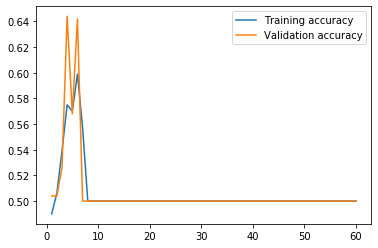

In [0]:
acc_augmentation = history_augmentation.history['acc']
validation_acc_augmentation = history_augmentation.history['val_acc']
print("validation accuracy" , validation_acc[-1])
epoch = range(1,len(acc_augmentation)+1)
plt.plot(epoch,acc_augmentation,label = 'Training accuracy')
plt.plot(epoch,validation_acc_augmentation,label = 'Validation accuracy')
plt.legend()

In [0]:
import shutil
train_cat= ['cat.{}.jpg'.format(i) for i in range(10000,11000)]
for f_name in train_cat:
  source_file = os.path.join(data_dir,f_name)
  tgt_file = os.path.join(train_cat_dir,f_name)
  shutil.copyfile(source_file,tgt_file)

validation_cat = ['cat.{}.jpg'.format(i) for i in range(11000,11500)]
for f_name in validation_cat:
  source_file = os.path.join(data_dir,f_name)
  tgt_file = os.path.join(validation_cat_dir,f_name)
  shutil.copyfile(source_file,tgt_file)

test_cat= ['cat.{}.jpg'.format(i) for i in range(11500,12000)]
for f_name in train_cat_2:
  source_file = os.path.join(data_dir,f_name)
  tgt_file = os.path.join(test_cat_dir,f_name)
  shutil.copyfile(source_file,tgt_file)


In [0]:
train_dog= ['dog.{}.jpg'.format(i) for i in range(1000)]
for f_name in train_dog:
  source_file = os.path.join(data_dir,f_name)
  tgt_file = os.path.join(train_dog_dir,f_name)
  shutil.copyfile(source_file,tgt_file)

validation_dog= ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for f_name in validation_dog:
  source_file = os.path.join(data_dir,f_name)
  tgt_file = os.path.join(validation_dog_dir,f_name)
  shutil.copyfile(source_file,tgt_file)

test_dog= ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for f_name in test_dog:
  source_file = os.path.join(data_dir,f_name)
  tgt_file = os.path.join(test_dog_dir,f_name)
  shutil.copyfile(source_file,tgt_file)
